### Program: 9 Performance Model Halo Updates ### 
Author: Xuying Zeng  
Email: xuzeng@ethz.ch  
Date: 28.AUG.2024  
Description: Data analysis of performance of different settings  

In [7]:
# import necessary package
import numpy as np
import glob
import matplotlib.pyplot as plt
import re

#### Resorted the files and calculate mean value & standard deviation ####

In [8]:
# sort files form 2 to 10
def extract_numbers_from_filename(filename):
    # extract number part
    match = re.search(r'nNodes_(\d+)_nHalo_(\d+)', filename)
    if match:
        node_number = int(match.group(1))
        halo_number = int(match.group(2))
        return (node_number, halo_number)
    return (float('inf'), float('inf')) 

directory_path = 'HPC4WC Data_new'

csv_files = glob.glob(f"{directory_path}/*.csv")
csv_files_sorted = sorted(csv_files, key=extract_numbers_from_filename)

# import CSV files and calculate mean and standard deviation
def calculate_mean_and_std_from_csv(directory_path):
    # List to hold all data arrays
    data_list = []

    # Read each CSV file into a NumPy array and add to data list
    for file in csv_files_sorted:
        data = np.loadtxt(file, delimiter=',')  # Assuming there's a header row
        data_list.append(data)

    # Stack all data arrays vertically
    all_data = np.vstack(data_list)
    # print(all_data)

    # Calculate mean and standard deviation along axis=1 (row-wise)
    mean_performance_time = np.mean(all_data, axis=1)
    std_performance_time = np.std(all_data, axis=1)

    return mean_performance_time, std_performance_time

mean_times, std_times = calculate_mean_and_std_from_csv(directory_path)

# # Print results, for debuging
# print()
# print("Mean Performance Time per Setting:")
# print(mean_times)
# print()
# print("Standard Deviation (Error Bars) per Setting:")
# print(std_times)

# check if standard diviation acceptable
print(np.max(std_times))

0.0017639144128444


#### Heatmap of time performace ####

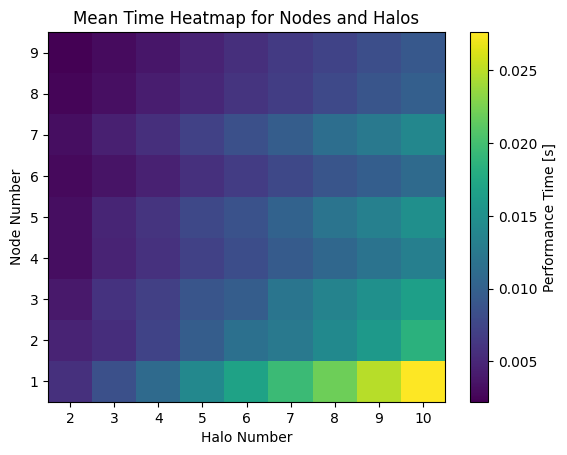

In [9]:
# create 2*2 matirx for plots
meantime_matrix = mean_times.reshape(9, 9) #python row-major order
standard_matrix = std_times.reshape(9, 9)

# each row of data represents a different halo update result for the corresponding node number
fig, ax = plt.subplots()
cax = ax.imshow(meantime_matrix, cmap='viridis', origin='lower', aspect='auto')
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Performance Time [s]')
# set labels
ax.set_xlabel('Halo Number')
ax.set_ylabel('Node Number')

ax.set_xticks(np.arange(9))  # halo from 2 to 10
ax.set_xticklabels(np.arange(2, 11))
ax.set_yticks(np.arange(9))  # node from 1 to 9
ax.set_yticklabels(np.arange(1, 10))

plt.title('Mean Time Heatmap for Nodes and Halos')
plt.show()

#### Performance comparison of different node numbers ####

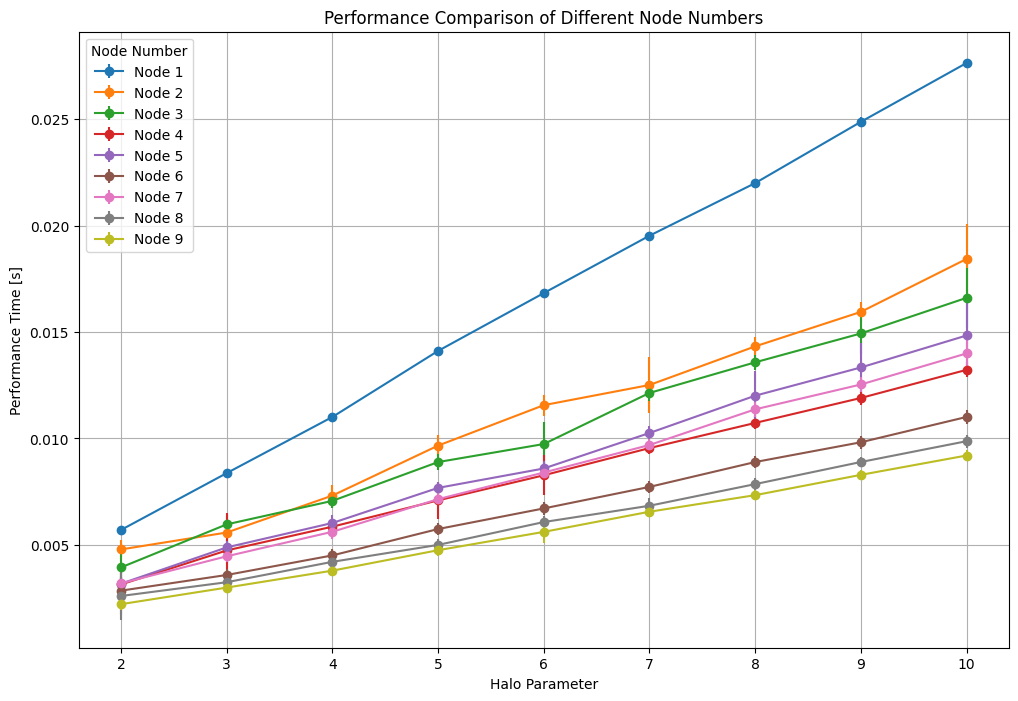

In [10]:
# coordinate and plot size settings
node_numbers = list(range(1, 10))
halo_parameters = list(range(2, 11))
plt.figure(figsize=(12, 8))

# each line represent corresponding node
for i, node in enumerate(node_numbers):
    plt.errorbar(halo_parameters, meantime_matrix[i], yerr=standard_matrix[i],
                 marker='o', label=f'Node {node}')
    
# plot
plt.title("Performance Comparison of Different Node Numbers")
plt.xlabel("Halo Parameter")
plt.ylabel("Performance Time [s]")
plt.legend(title="Node Number")
plt.grid(True)

plt.show()

#### Performance comparision of different halo numbers ####

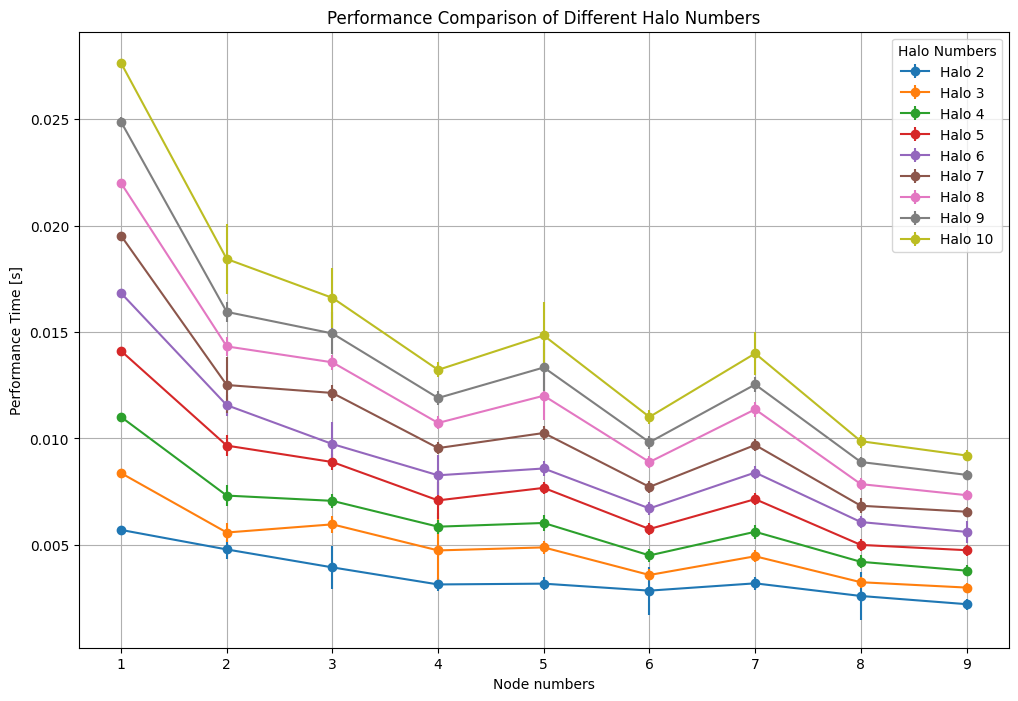

In [11]:
# coordinate and plot size settings
node_numbers = list(range(1, 10))
halo_parameters = list(range(2, 11))
plt.figure(figsize=(12, 8))

# each line represent corresponding halo
for i, halo in enumerate(halo_parameters):
    plt.errorbar(node_numbers, meantime_matrix[:,i], yerr=standard_matrix[:,i],
                 marker='o', label=f'Halo {halo}')
    
# plot
plt.title("Performance Comparison of Different Halo Numbers")
plt.xlabel("Node numbers")
plt.ylabel("Performance Time [s]")
plt.legend(title="Halo Numbers")
plt.grid(True)

plt.show()